In [11]:
**Author**: github.com/leeleilei

**声明**: 本示例中的评论仅代表作者个人观点，不构成任何形式的投资建议。

## 介绍

本文尝试分析了“长赢指数投资”的品种相关性，附带对比了其他窄基类行业指数的成长性。

**注意**：该视角是粗糙的分析，缺少诸如alpha/beta/风险收益率/回撤等指标数据。成长性简单来自于指数收益率，并非真实资产收益，因为指数本身是关于价格的统计，没有考虑分红情况。如果计算收益率，要选取一个代表性指数基金，按照分红再投资方式计算得出真实收益率。本文的收益率对比只能用作趋势参考，例如一个品种成长性不太好，显然不能重仓。

因为作者习惯原因，绘图的部分没有采用xalpha默认引擎（pyecharts），而是seaborn。

对于相关性结果，如果数值小于等于0.5，我们认为弱相关；大于等于0.8，我们认为强相关；其他中等相关水平。对于若相关品种，符合资产配置的逻辑，对于强相关品种，则可以继续深入分析收益率、回撤等其他指标做出取舍。

## 初始化

第一步导入必要的库，设置matplotlib库。

In [7]:
import xalpha as xa
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 中文字体设置-黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font="SimHei")  # 解决Seaborn中文显示问题

# seaborn默认只能显示6个曲线，扩充到11个
dash_styles = [
    "",
    (4, 1.5),
    (1, 1),
    (3, 1, 1.5, 1),
    (5, 1, 1, 1),
    (5, 1, 2, 1, 2, 1),
    (2, 2, 3, 1.5),
    (1, 2.5, 3, 1.2),
    (1, 3.5, 3, 1.2),
    (2, 2.5, 3, 1.2),
    (1, 1.5, 3, 1.2),
    (5, 1, 2, 1, 2, 1),
]

In [ ]:
## 封装对比函数

我们一次性显示相关性结果和增长率曲线，打包一个函数，接受传入品种代号后，输出相关性和对比曲线。

In [10]:
# 默认取2010开始的数据
def comp(indices_dict, fig_title, start="2010-01-01"):
    comp = xa.Compare(*indices_dict.keys(), start=start)
    data_corr = comp.corr()

    # 格式化列名和index
    data_corr.columns = [indices_dict[name] for name in data_corr.columns]
    data_corr.index = data_corr.columns

    # 两个画布
    fig, axes = plt.subplots(2, 1, figsize=(12, 15))
    # 相关性
    corr_g = sns.heatmap(
        data_corr,
        ax=axes[0],
        cmap="RdBu_r",
        annot=True,
        fmt=".2f",
        linewidths=0.1,
        alpha=0.7,
    )
    corr_g.set_title("相关性")

    # 收益率
    data_trend = comp.totdf
    data_trend.index = data_trend["date"]
    # 忽略第一列的date
    data_trend = data_trend.iloc[:, 1:]
    # 格式化列名
    data_trend.columns = [indices_dict[code] for code in data_trend.columns]

    # 收益率画图
    trend_g = sns.lineplot(data=data_trend, ax=axes[1], dashes=dash_styles)
    trend_g.set_title("增长率")

    plt.suptitle(fig_title)
    plt.show()

In [ ]:
## 大类资产

主要指股指、商品和贵金属的搭配，其中股指涉及欧美、日本、香港指数。

关于代码的惯例请参考这个答疑链接：https://github.com/refraction-ray/xalpha/issues/36


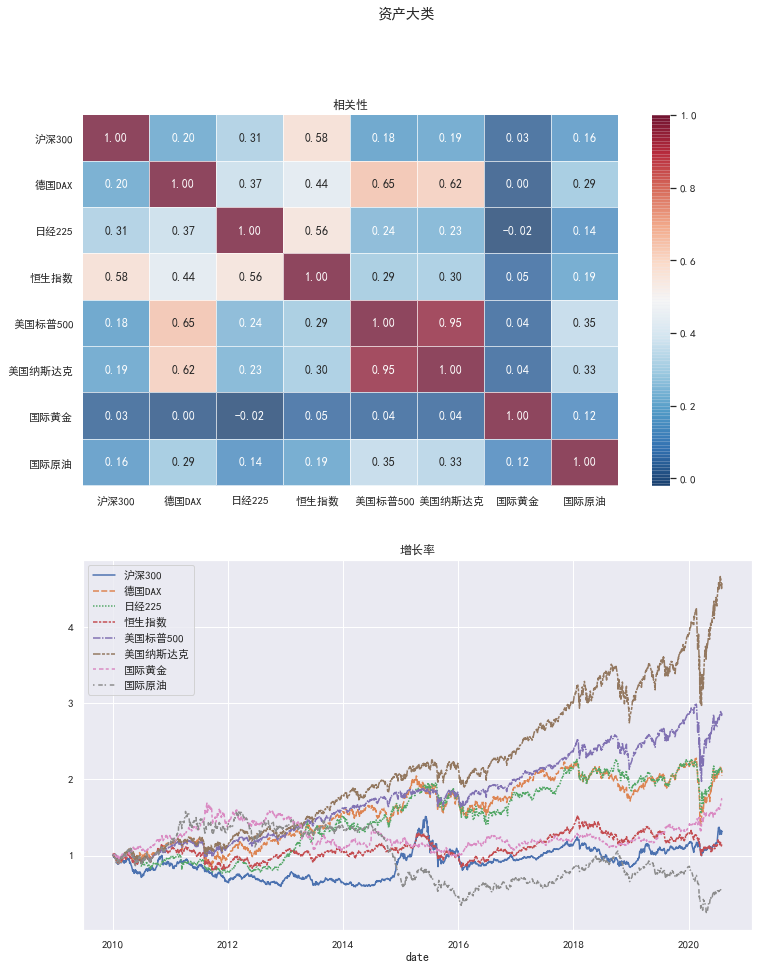

In [11]:
region_indices = {
    "SH000300": "沪深300",
    "indices/germany-30": "德国DAX",
    "indices/japan-ni225": "日经225",
    "indices/hang-sen-40": "恒生指数",
    "indices/us-spx-500": "美国标普500",
    "indices/nasdaq-composite": "美国纳斯达克",
    "commodities/gold": "国际黄金",
    "commodities/brent-oil": "国际原油",
}

comp(region_indices, fig_title="资产大类")

In [ ]:
从结果看，大类资产相关性非常完美。纳斯达克相比标普500增长性更高（回撤自然也会大些），偏好激进方案的可以将其调整为纳斯达克指数。

## A股宽基指数

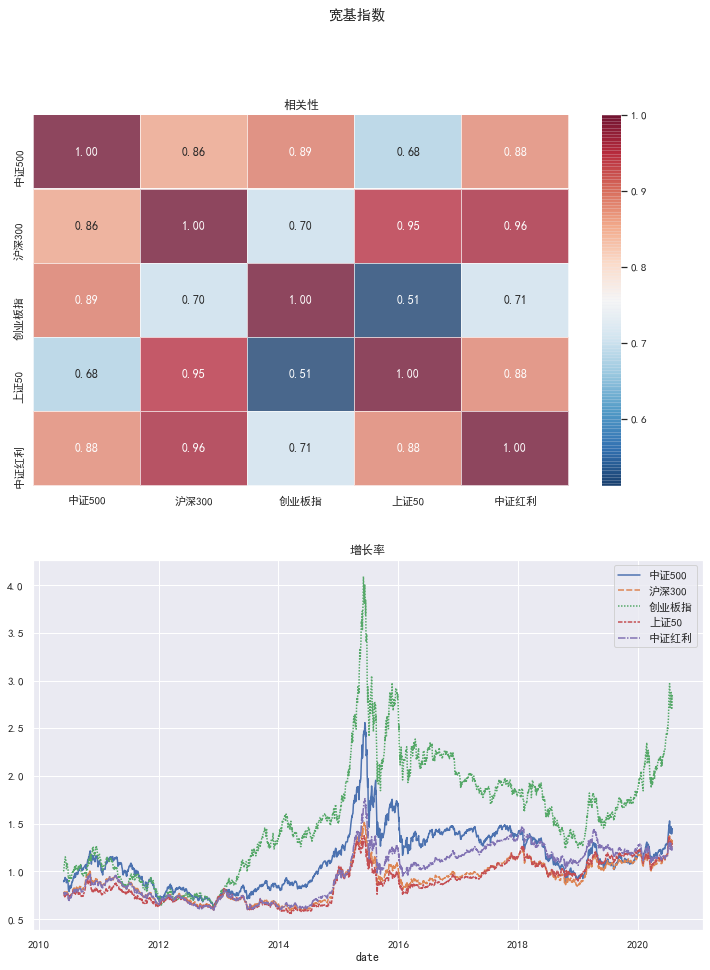

In [12]:
kuan_indices = {
    "SH000905": "中证500",
    "SH000300": "沪深300",
    "SZ399006": "创业板指",
    "SH000016": "上证50",
    "SH000922": "中证红利",
}

comp(kuan_indices, fig_title="宽基指数")

In [ ]:
同市场下，指数的相关性较大，但仍能有一些大致的判断。首先看出创业板跟其他指数相关性最低，其次是上证50，再者是中证500，中证红利。比较有争议的是沪深300，可以取头部基金进一步对比分析收益率。

## 窄基行业指数

选取的是当前“长赢指数投资”配置过的品种，

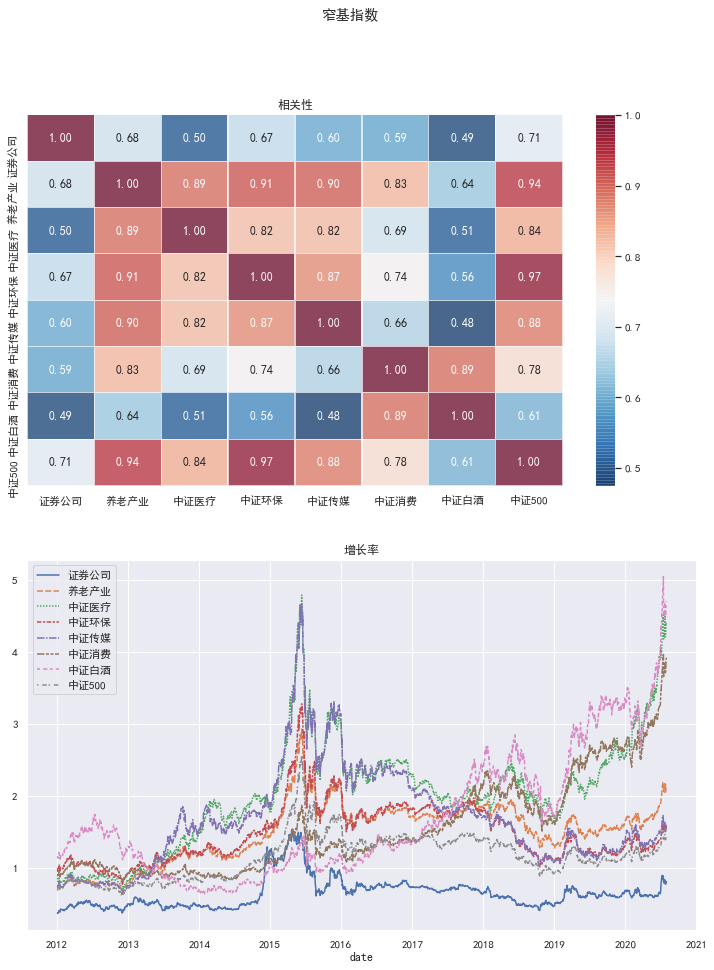

In [17]:
hangye_indices = {
    "SZ399975": "证券公司",
    "SZ399812": "养老产业",
    "SZ399989": "中证医疗",
    "SH000827": "中证环保",
    "SZ399971": "中证传媒",
    "SH000932": "中证消费",
    "SZ399997": "中证白酒",
    "SH000905": "中证500",
}

comp(hangye_indices, fig_title="窄基指数")

In [ ]:
首先看到证券公司和中证白酒和其他品种相关性最低，但证券的成长性最差。

成长性比较好的还有中证医疗、中证消费。中证养老产业的成长性并没有很好。

成长性决定了该品种在资产配置中的大致高低比例。以此来看，白酒、医疗、消费配置的比例应该稍高。

其次养老产业和中证消费、中证传媒、环保有0.9左右的相关性，可以适当取舍。

消费长赢配置里面，收益率达到50%左右被清仓，错失后面的上涨。不过按照估值和止盈策略，这个操作本身没有什么对错。另一个思路是，消费可以参考医疗，成长性比较好，长期配置持有。

## 其他行业品种

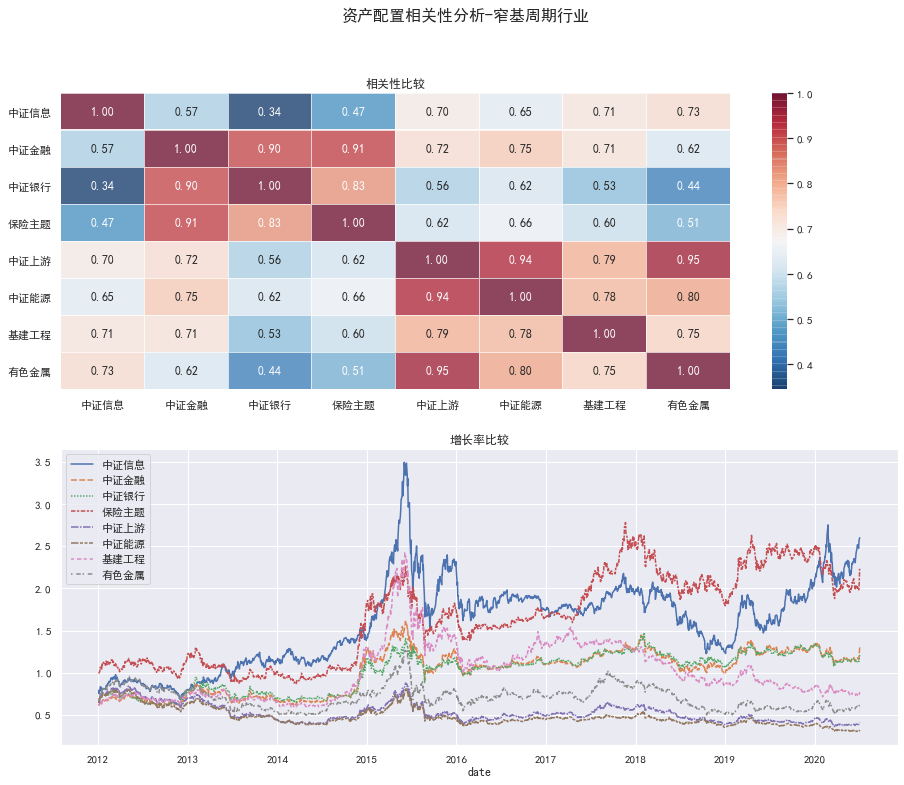

In [19]:
hangye_indices = {
    "SH000935": "中证信息",
    "SH000934": "中证金融",
    "SZ399986": "中证银行",
    "SZ399809": "保险主题",
    "SH000961": "中证上游",
    "SH000928": "中证能源",
    "SZ399995": "基建工程",
    "SH000819": "有色金属",
}

comp(hangye_indices, fig_title="窄基周期行业")

In [ ]:
保险和信息产业成长性较好，金融和银行相关性非常大。

基建、有色、材料和上游指数等周期性行业都趋向黯淡。

## 相似品种-基建类

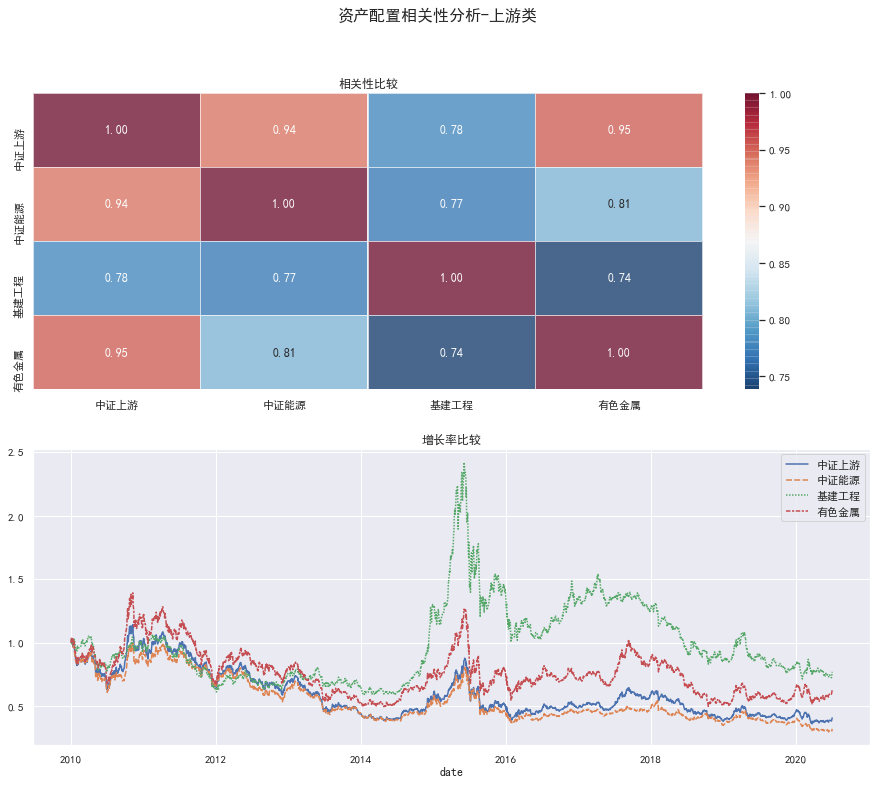

In [21]:
cycle_indices = {
    "SH000961": "中证上游",
    "SH000928": "中证能源",
    "SZ399995": "基建工程",
    "SH000819": "有色金属",
}

comp(cycle_indices, title="资产配置相关性分析-上游类")

In [ ]:
## 债权类

债券类分析，增长性没有可比性，因为暂时没有考虑分红和再投资的收益。

纯债、国债和其他收益债相关性要低，符合配置原则。

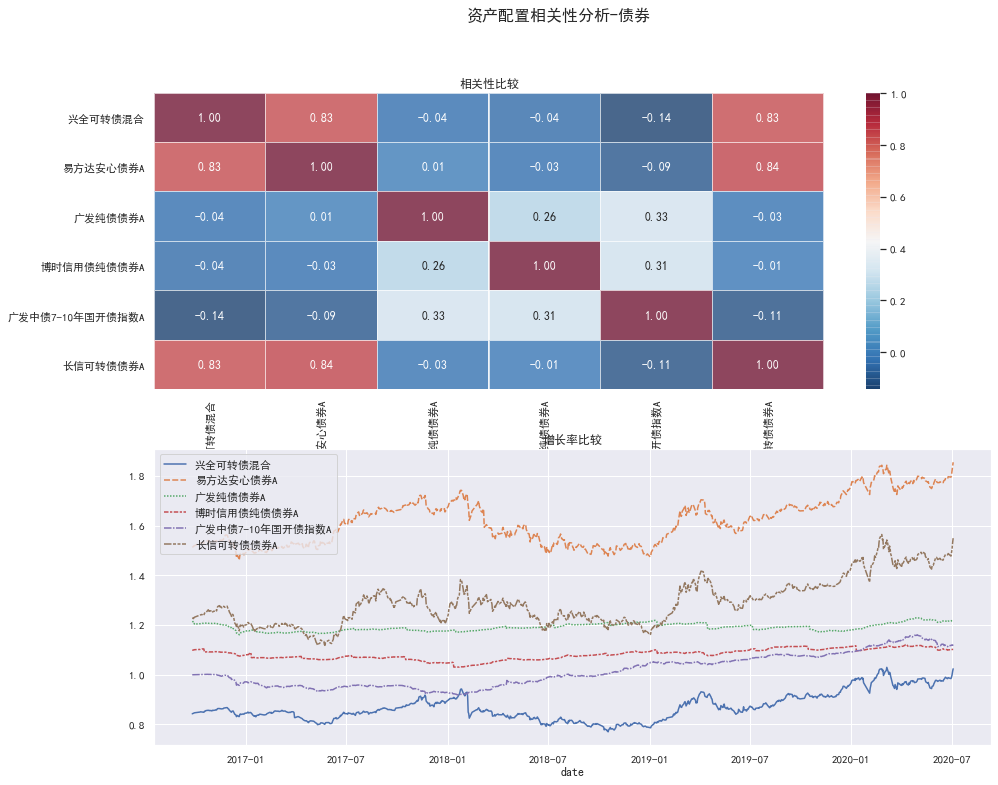

In [23]:
bonds = {
    "F340001": "兴全可转债混合",
    "F110027": "易方达安心债券A",
    "F270048": "广发纯债债券A",
    "F050027": "博时信用债纯债债券A",
    "F003376": "广发中债7-10年国开债指数A",
    "F519977": "长信可转债债券A",
}
comp(bonds, title="资产配置相关性分析-债券")

In [ ]:
## 2020行情中的白酒类

中证白酒要好于中证酒。

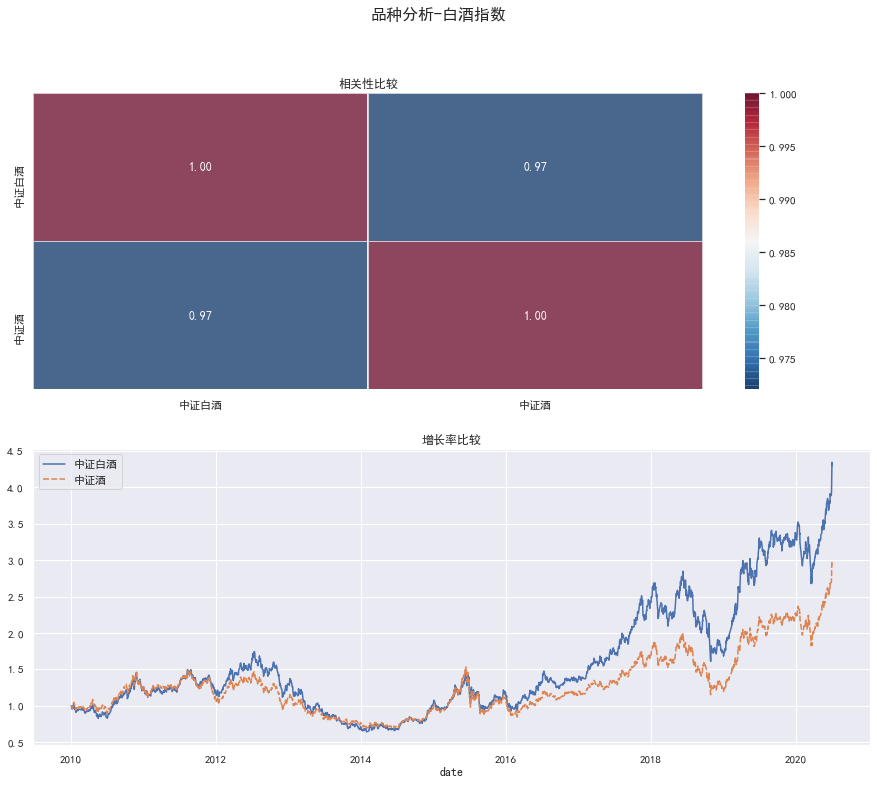

In [24]:
wine_indices = {
    "SZ399997": "中证白酒",
    "SZ399987": "中证酒",
}
comp(wine_indices, fig_title="品种分析-白酒指数")

In [ ]:
## 红利指数

单纯从指数收益看，深圳红利好于中证红利，可以用实际收益率再次验证。

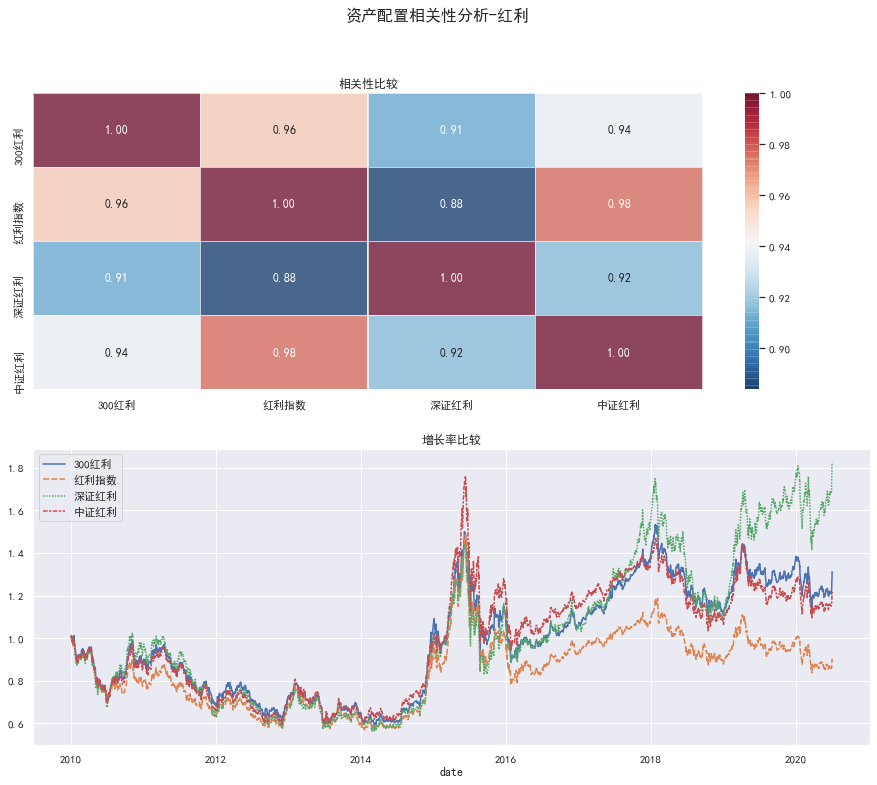

In [25]:
hongli_indices = {
    "SH000821": "300红利",
    "SH000015": "红利指数",
    "SZ399324": "深证红利",
    "SH000922": "中证红利",
}

comp(hongli_indices, fig_title="资产配置相关性分析-红利")

In [ ]:
## 医药类指数

托新冠所赐，生物医药等一绝后尘。生物医药和国证医药都要好于150份中的全指医药，可以考虑替换。

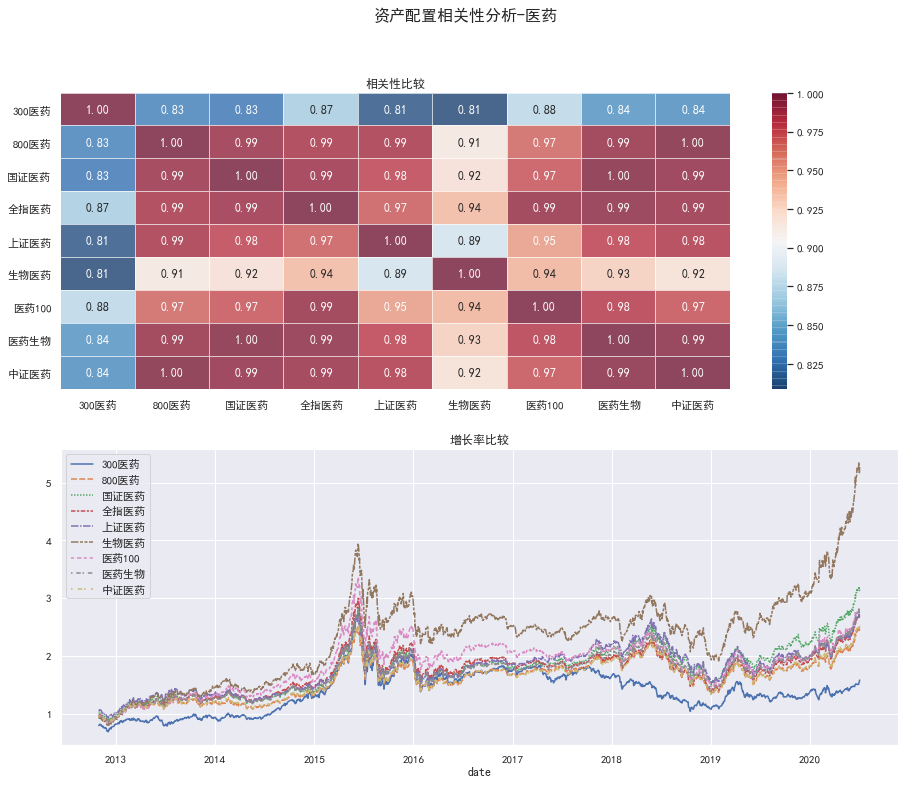

In [26]:
med_indices = {
    "SH000091": "300医药",
    "SH000841": "800医药",
    "SZ399394": "国证医药",
    "SH000991": "全指医药",
    "SH000037": "上证医药",
    "SZ399441": "生物医药",
    "SH000978": "医药100",
    "SH000808": "医药生物",
    "SH000933": "中证医药",
}

comp(med_indices, fig_title="资产配置相关性分析-医药")

In [ ]:
## 金融类

几乎无差别。

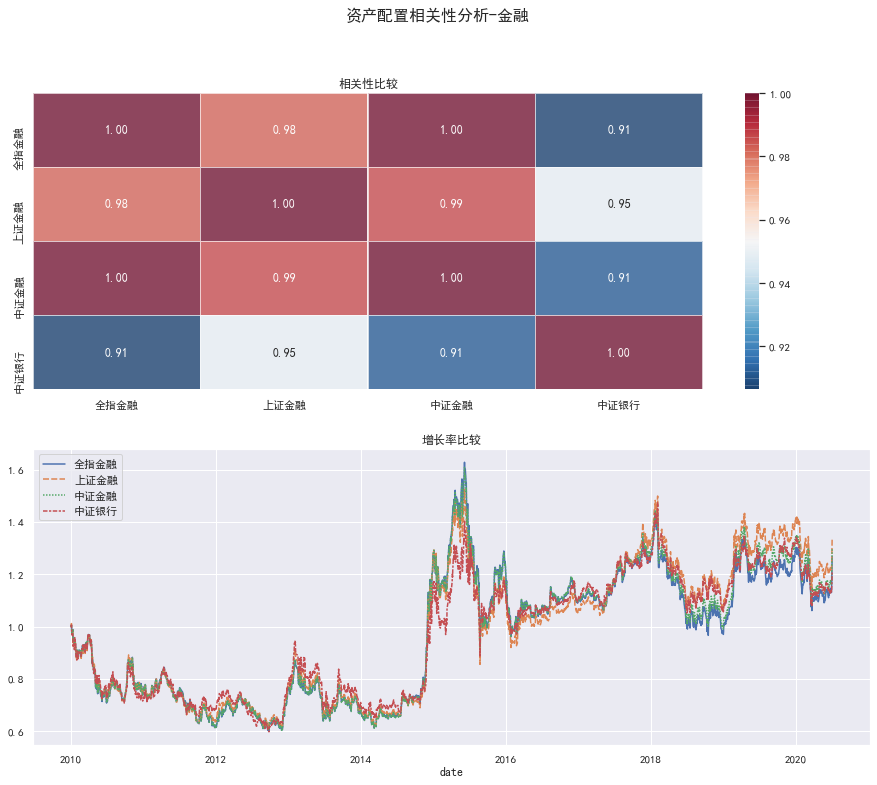

In [27]:
bank_indices = {
    "SH000992": "全指金融",
    "SH000038": "上证金融",
    "SH000934": "中证金融",
    "SZ399986": "中证银行",
}

comp(bank_indices, fig_title="资产配置相关性分析-金融")

In [ ]:
## 计算机信息类

除了500信息，其他相差不多。

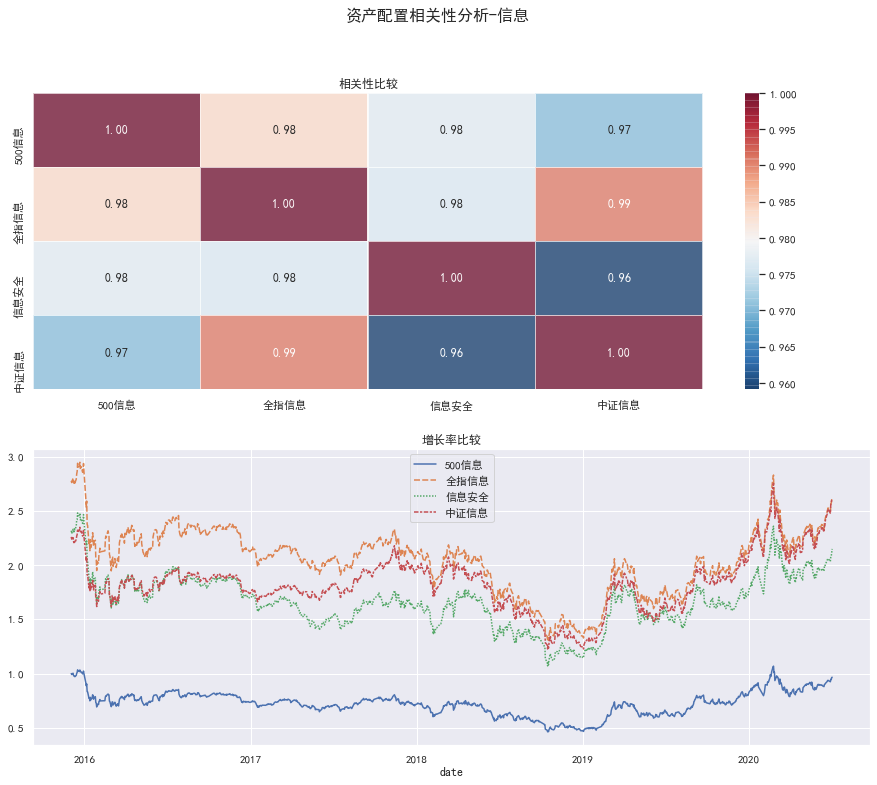

In [28]:
comp_indices = {
    "SH000858": "500信息",
    "SH000993": "全指信息",
    "SZ399994": "信息安全",
    "SH000935": "中证信息",
}

comp(comp_indices, fig_title="资产配置相关性分析-信息")

In [ ]:
## 创业板

相关性几乎无差别，需要更深入分析具体基金品种。

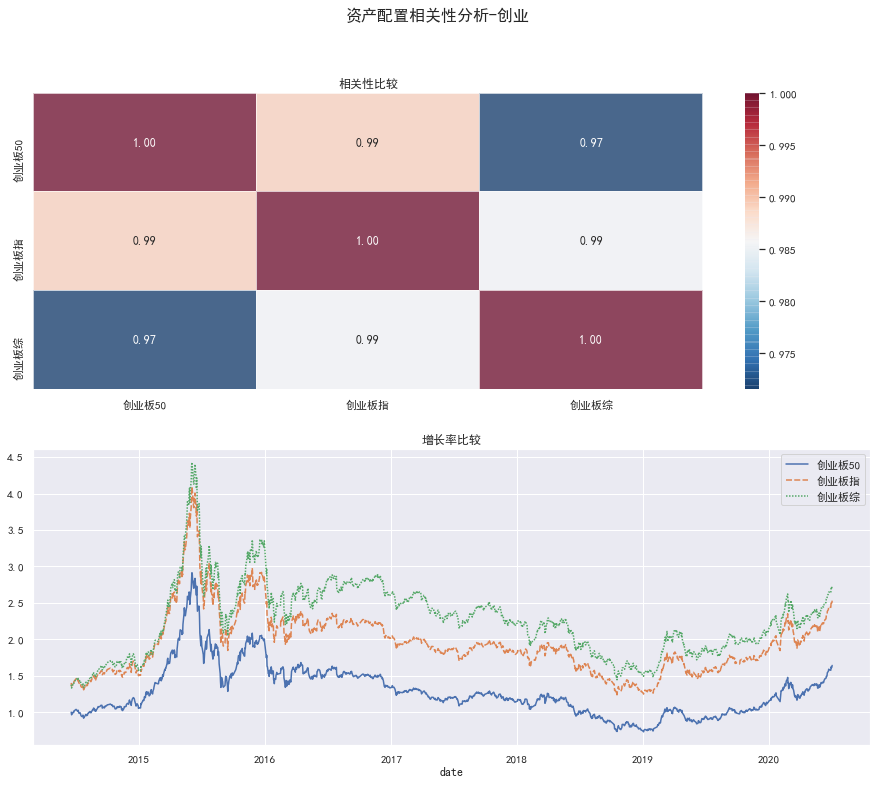

In [42]:
chuang_indices = {
    "SZ399673": "创业板50",
    "SZ399006": "创业板指",
    "SZ399102": "创业板综",
}

comp(chuang_indices, fig_title="资产配置相关性分析-创业")

In [ ]:
## 基建 vs 地产

相关性低，但地产类要好过基建类。

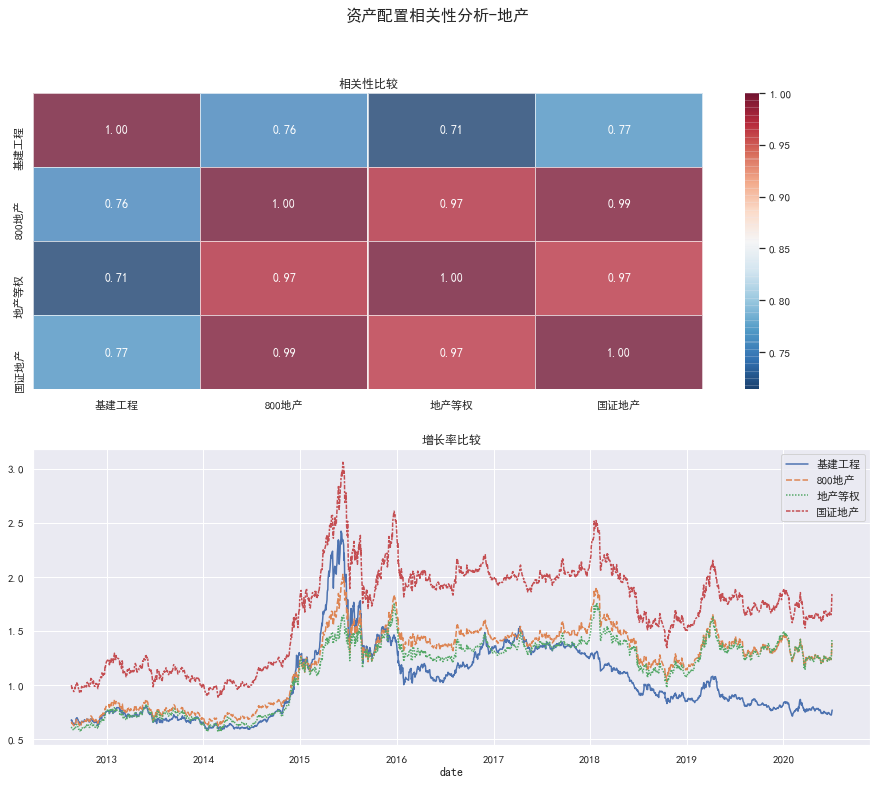

In [44]:
land_indices = {
    "SZ399995": "基建工程",
    "SZ399965": "800地产",
    "SZ399983": "地产等权",
    "SZ399393": "国证地产",
}


comp(land_indices, fig_title="资产配置相关性分析-地产")

In [ ]:
## 石油类

相关性上看油气股票和原油类关系不大，而且都和原油产品本身相关性弱。


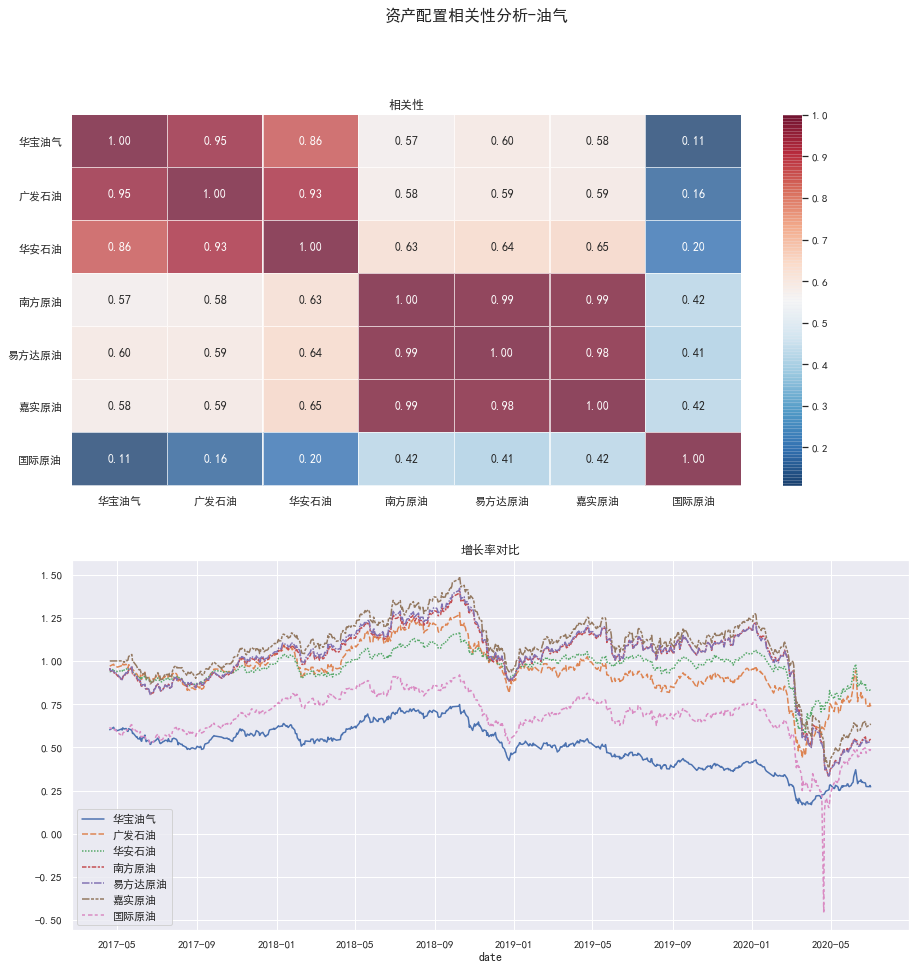

In [8]:
oil_funds = {
    "F162411": "华宝油气",
    "F162719": "广发石油",
    "F162719": "广发石油",
    "F160416": "华安石油",
    "F501018": "南方原油",
    "F161129": "易方达原油",
    "F160723": "嘉实原油",
    "commodities/crude-oil": "国际原油",
}

comp(oil_funds, fig_title="资产配置相关性分析-油气")